# **Medical Insurance Expense Prediction Using Machine Learning**
This notebook explores predictive modeling for estimating medical insurance expenses using a variety of machine learning techniques. It covers data preprocessing and implements multiple regression models.



##**Libraries**

In [66]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

##**Data Preprocessing**

In [67]:
# Load the unclean dataset
unclean_data = pd.read_csv('unclean_insurance.csv')
unclean_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,NaN,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [68]:
# Remove duplicate rows
cleaned_data = unclean_data.drop_duplicates()

In [69]:
# Check for missing values
print(cleaned_data.isnull().sum())

# Fill missing numerical values with the mean
numerical_cols = cleaned_data.select_dtypes(include=np.number).columns
for col in numerical_cols:
    cleaned_data[col].fillna(cleaned_data[col].mean(), inplace=True)

# Fill missing categorical values with the mode
categorical_cols = cleaned_data.select_dtypes(exclude=np.number).columns
for col in categorical_cols:
    cleaned_data[col].fillna(cleaned_data[col].mode()[0], inplace=True)

# Verify if missing values are filled
print(cleaned_data.isnull().sum())

age         59
sex          0
bmi         49
children     0
smoker      57
region       0
charges      0
dtype: int64
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


<ipython-input-69-e656ac2e5aa4>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_data[col].fillna(cleaned_data[col].mean(), inplace=True)
<ipython-input-69-e656ac2e5aa4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[col].fillna(cleaned_data[col].mean(), inplace=True)
<ipython-input-69-e656ac2e5aa4>:12: FutureWarning: A 

In [70]:
# Save the cleaned dataset
cleaned_file_path = 'cleaned_insurance.csv'
cleaned_data.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to {cleaned_file_path}")

Cleaned dataset saved to cleaned_insurance.csv


In [71]:
# Read new cleaned dataset
data = pd.read_csv('cleaned_insurance.csv')

In [ ]:
# One-Hot Encoding using pandas
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

In [72]:
# Define Features and Target
X = data.drop('charges', axis=1)
y = data['charges']

In [73]:
# Min-Max Scaling for all Features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [74]:
data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19.0000,27.900,0,16884.92400,False,True,False,False,True
1,18.0000,33.770,1,1725.55230,True,False,False,True,False
2,39.2125,33.000,3,4449.46200,True,False,False,True,False
3,33.0000,22.705,0,21984.47061,True,False,True,False,False
4,32.0000,28.880,0,3866.85520,True,False,True,False,False


##**Train and Test Data**

In [75]:
# Split data into train and test sets using default 80% Train and 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##**Evaluation Metrics Baseline**

In [76]:
# Compute the mean of the target variable (y_train)
baseline_prediction = y_train.mean()

# Generate predictions for the test set using the baseline model
baseline_predictions = [baseline_prediction] * len(y_test)

# Calculate Baseline MSE
baseline_mse = mean_squared_error(y_test, baseline_predictions)

# Calculate Baseline MAE
baseline_mae = mean_absolute_error(y_test, baseline_predictions)

# Print baseline metrics
print(f'Baseline Mean Squared Error (MSE): {baseline_mse}')
print(f'Baseline Mean Absolute Error (MAE): {baseline_mae}')


Baseline Mean Squared Error (MSE): 168214411.385883
Baseline Mean Absolute Error (MAE): 9679.529357926733


##**Linear Regression Model**

Train the model

In [77]:
# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

Evaluate the model

In [78]:
# Evaluate the Linear Regression Model
mse_linear = mean_squared_error(y_test, y_pred)
mae_linear= mean_absolute_error(y_test, y_pred)
r2_linear = r2_score(y_test, y_pred)

print(f'Linear Regression Model Mean Squared Error (MSE): {mse_linear}')
print(f'Linear Regression Model Mean Absolute Error (MAE): {mae_linear}')
print(f'Linear Regression Model R-squared Score (R2): {r2_linear}')

Linear Regression Model Mean Squared Error (MSE): 43284501.49963735
Linear Regression Model Mean Absolute Error (MAE): 4490.432746031975
Linear Regression Model R-squared Score (R2): 0.7414318703242042


Actual v Predicted Chart

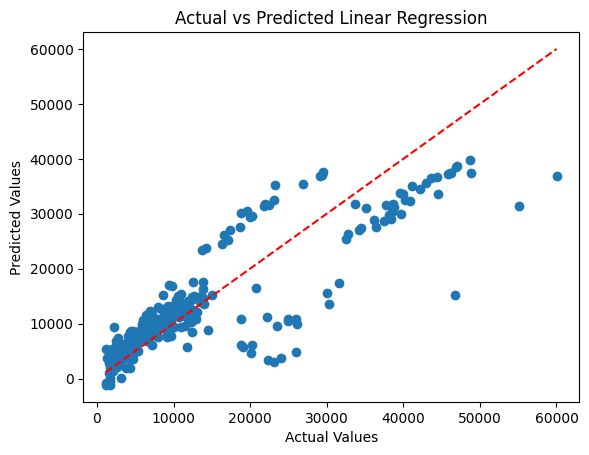

In [79]:
import matplotlib.pyplot as plt

# Plot actual vs predicted
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Linear Regression')
plt.show()

##**Ridge Regression Model**

Train the model

In [80]:
# Initialize and fit the Ridge Regressor model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Predict on test data
y_pred_ridge = ridge.predict(X_test)

Evaluate the model

In [81]:
# Evaluate the Ridge Regression Model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Ridge Regression Model Mean Squared Error (MSE): {mse_ridge}')
print(f'Ridge Regression Model Mean Absolute Error (MAE): {mae_ridge}')
print(f'Ridge Regression Model R-squared Score (R2): {r2_ridge}')

Ridge Regression Model Mean Squared Error (MSE): 43300216.64102564
Ridge Regression Model Mean Absolute Error (MAE): 4492.706145654994
Ridge Regression Model R-squared Score (R2): 0.7413379929645124


Actual v Predicted Chart

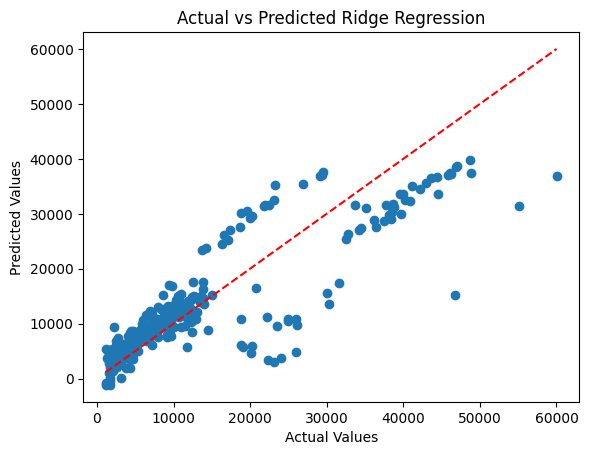

In [82]:
# Plot actual vs predicted
plt.scatter(y_test, y_pred_ridge)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Ridge Regression')
plt.show()

##**Decision Tree Regression Model**

Get the best parameters for this dataset

In [83]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,                     # 5-fold cross-validation
    scoring='r2',             # Optimize for R² score
    n_jobs=-1                 # Use all processors
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}


Train the model

In [84]:
# Initialize and fit the Decision Tree Regressor with specified hyperparameters
tree_model = DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, min_samples_split=2, random_state=42)
tree_model.fit(X_train, y_train)

# Predict on test data
y_pred_tree = tree_model.predict(X_test)

Evaluate the model

In [85]:
# Evaluate the Decision Tree Regression Model
mse_tree = mean_squared_error(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f'Decision Tree Regression Model Mean Squared Error (MSE): {mse_tree}')
print(f'Decision Tree Regression Model Mean Absolute Error (MAE): {mae_tree}')
print(f'Decision Tree Regression Model R-squared Score (R2): {r2_tree}')

Decision Tree Regression Model Mean Squared Error (MSE): 30383062.300611854
Decision Tree Regression Model Mean Absolute Error (MAE): 3223.8734906632712
Decision Tree Regression Model R-squared Score (R2): 0.818501049550999


Actual v Predicted Chart

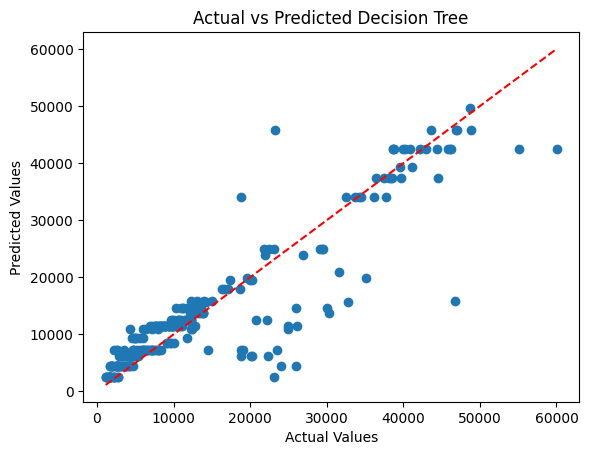

In [86]:
# Plot actual vs predicted
plt.scatter(y_test, y_pred_tree)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Decision Tree')
plt.show()

##**Artificial Neural Network**

Build the network (2 layers)

In [87]:
# Building the two-layer ANN model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),  # Input layer and first hidden layer
    Dense(32, activation='relu'),  # Second hidden layer
    Dense(1)  # Output layer
])

# Compiling the model using Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

# Predict on test data
y_pred_ann = model.predict(X_test)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 325048320.0000 - val_loss: 299084608.0000
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 309406432.0000 - val_loss: 281571328.0000
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 308907168.0000 - val_loss: 222819392.0000
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 217395760.0000 - val_loss: 124368584.0000
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 94879360.0000 - val_loss: 60842952.0000
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 53601800.0000 - val_loss: 45221728.0000
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 41007644.0000 - val_loss: 41856564.0000
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39341396.0000 - val_loss: 41041024.0000
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 43565612.0000 - val_loss: 40797432.0000
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 38867628.0000 - val_loss: 40634964.0000
Epoch 11/100


Evaluate the model

In [88]:
# Evaluate the Artificial Neural Network model
mse_ann = mean_squared_error(y_test, y_pred_ann)
mae_ann = mean_absolute_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)

print(f'Artificial Neural Network Mean Squared Error (MSE): {mse_ann}')
print(f'Artificial Neural Network Mean Absolute Error (MAE): {mae_ann}')
print(f'Artificial Neural Network R-squared Score (R2): {r2_ann}')

Artificial Neural Network Mean Squared Error (MSE): 34066106.57202681
Artificial Neural Network Mean Absolute Error (MAE): 3699.7431774797396
Artificial Neural Network R-squared Score (R2): 0.7964996902704515


Training history chart

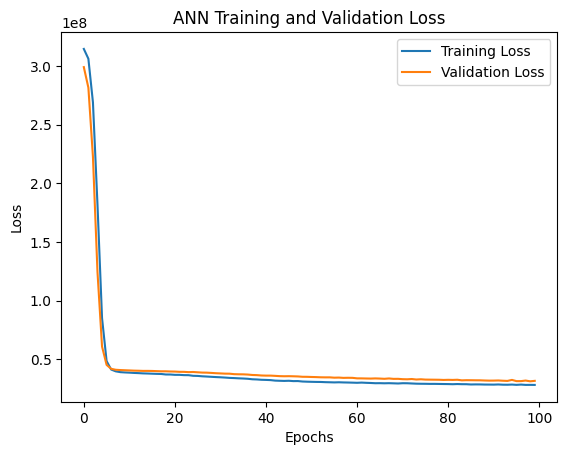

In [89]:
# Plotting the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('ANN Training and Validation Loss')
plt.legend()
plt.show()

Actual v Predicted Chart

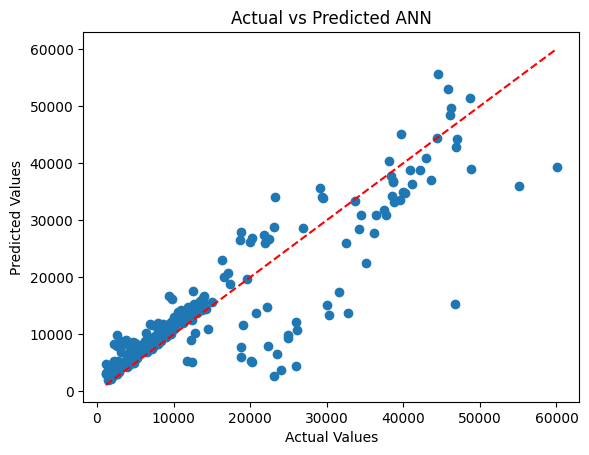

In [90]:
# Plot actual vs predicted
plt.scatter(y_test, y_pred_ann)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted ANN')
plt.show()